In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import time

In [2]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        self.transform = transform
        if train:
            self.X=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\updated data set\merged_x.npy")
            self.Y=torch.as_tensor(np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\updated data set\merged_y.npy")).type(torch.LongTensor)
            self.len=self.X.shape[0]
        else:
            self.X=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\updated data set\test_x.npy")
            self.Y=torch.as_tensor(np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\updated data set\test_y.npy")).type(torch.LongTensor)
            self.len=self.X.shape[0]            
 
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        image =self.X[idx]
        y=self.Y[idx]
        if self.transform:
            image = self.transform(image)
        return image, y

In [3]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
tensorize = transforms.ToTensor()
train_dataset = Dataset(transform=tensorize,train=True)
validation_dataset = Dataset(transform=tensorize,train=False)

In [4]:
#plt.imshow(train_dataset[4][0])
#print(train_dataset[4][1])

In [53]:
model=models.resnet18(pretrained=True)
for parametre in model.parameters():
    parametre.requires_grad=False

In [6]:
model.fc=nn.Sequential(nn.Linear(512, 256),torch.nn.Dropout(p=0.5),nn.Linear(256, 128),nn.Linear(128,2))
device=torch.device("cuda:0")
device1=torch.device("cpu")
model=model.to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
creterion=nn.CrossEntropyLoss()
optimiser = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

In [8]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=64)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=64)

In [9]:
n_epochs=10
loss_list=[]
accuracy_list=[]
N_test=len(validation_dataset)
start_time = time.time()

for epoch in range(n_epochs):
    
    for x, y in train_loader:
        y=y.to(device)
        x=x.to(device)
        model.train()
        optimiser.zero_grad()
        z=model(x)
        loss=creterion(z,y)
        loss.backward()
        optimiser.step()
        loss_list.append(loss.data)
        
    correct=0
    for x_test, y_test in validation_loader:
        x_test=x_test.to(device)
        y_test=y_test.to(device)
        model.eval()
        z=model(x_test)
        _,yhat=torch.max(z.data,1)
        correct+=(yhat==y_test).sum().item()
   
    accuracy=correct/N_test
    accuracy_list.append(accuracy)
    delay=time.time()-start_time
    print("epoch "+str(epoch)+" est terminé")
    print("temps d'éxécution pour cette epoch: "+str(delay/60)+" mn")
    print("accuracy pour cette epoch: "+str(accuracy))


epoch 0 est terminé
temps d'éxécution pour cette epoch: 1.4561094959576926 mn
accuracy pour cette epoch: 0.8592814371257484
epoch 1 est terminé
temps d'éxécution pour cette epoch: 2.8812654892603557 mn
accuracy pour cette epoch: 0.8642714570858283
epoch 2 est terminé
temps d'éxécution pour cette epoch: 4.30898030201594 mn
accuracy pour cette epoch: 0.8707584830339321
epoch 3 est terminé
temps d'éxécution pour cette epoch: 5.73875629901886 mn
accuracy pour cette epoch: 0.8697604790419161
epoch 4 est terminé
temps d'éxécution pour cette epoch: 7.174981645743052 mn
accuracy pour cette epoch: 0.8657684630738522
epoch 5 est terminé
temps d'éxécution pour cette epoch: 8.607882591088613 mn
accuracy pour cette epoch: 0.8762475049900199
epoch 6 est terminé
temps d'éxécution pour cette epoch: 10.039171826839446 mn
accuracy pour cette epoch: 0.876746506986028
epoch 7 est terminé
temps d'éxécution pour cette epoch: 11.47795768181483 mn
accuracy pour cette epoch: 0.8782435129740519
epoch 8 est term

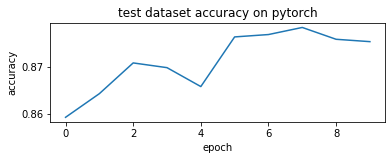

In [12]:
plt.figure(1)
plt.subplot(211)
accuracy_list1=accuracy_list
plt.plot(accuracy_list1)
plt.title('test dataset accuracy on pytorch')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [13]:
torch.save(model, r"C:\Users\anis_\Desktop\modèle cancer detection\pytorch\model\model")

In [15]:
model = torch.load(r"C:\Users\anis_\Desktop\modèle cancer detection\pytorch\model\model")
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [52]:
X=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\updated data set\val_x.npy")
Y=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\updated data set\val_y.npy")

In [51]:
print("______prediction_from_validation_set_(pytorch)______")
for (i,image) in enumerate(X[500:520]):
    image=transforms.functional.to_tensor(image)
    z=model(image.unsqueeze(0).to(device))
    _,yhat=torch.max(z.data,1)
    print("prediction of image number "+str(i+500)+" is "+str(y[i].to(device1).numpy()==yhat.to(device1).numpy()[0]))


______prediction_from_validation_set_(pytorch)______
prediction of image number 500 is True
prediction of image number 501 is True
prediction of image number 502 is True
prediction of image number 503 is False
prediction of image number 504 is True
prediction of image number 505 is True
prediction of image number 506 is True
prediction of image number 507 is True
prediction of image number 508 is True
prediction of image number 509 is True
prediction of image number 510 is True
prediction of image number 511 is True
prediction of image number 512 is True
prediction of image number 513 is True
prediction of image number 514 is True
prediction of image number 515 is True
prediction of image number 516 is True
prediction of image number 517 is True
prediction of image number 518 is True
prediction of image number 519 is True
